In [50]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import tkinter as Tk

def norme(x1,y1,x2,y2):
    return ((x2-x1)**2+(y2-y1)**2)**0.5

def colineaire(x1,y1,x2,y2):
    return abs(abs(x1*y2)-abs(x2*y1))<=0.1

def egal_eps(e1,e2,eps):
    x1,y1=e1
    x2,y2=e2
    return norme(x1,y1,x2,y2)<=eps

def dans_vision(obs,per,obj):
    xp,yp=per
    xobs,yobs=obs
    xobj,yobj=obj
    xu=xobj-xp
    yu=yobj-yp
    xv=xobs-xp
    yv=yobs-yp
    ps=xu*xv+yu*yv
    if ps/(norme(xu,yu,0,0)*norme(xv,yv,0,0))>0:
        return True
    return False

def libre_devant(L_obs,per,obj,cv):
    xp,yp=per
    xobj,yobj=obj
    for obs in L_obs:
        xobs,yobs=obs
        nobs=norme(xp,yp,xobs,yobs)
        if ((nobs<=cv) and dans_vision(obs,per,obj)):
            if colineaire(xobj-xp,yobj-yp,xobs-xp,yobs-yp):
                return False
    return True

def colision(per,L_per,L_obs):
    nb_col=0;
    xp,yp=per
    for e in L_per:
        xe,ye=e
        n=norme(xp,yp,xe,ye)
        if n<0.80:
            nb_col=nb_col+1
    return nb_col-1;

def inter_pp(xp,yp,L_per,obj,cv):
    xip,yip=(0,0)
    for e in L_per:
        xe,ye=e
        if (xe,ye)!=(xp,yp):
            np=norme(xp,yp,xe,ye)
            if (np<=cv) and dans_vision((xe,ye),(xp,yp),obj):
                xip=xip+(xp-xe)
                yip=yip+(yp-ye)
    nip=norme(xip,yip,0,0)
    if nip<=0.1:
        return (0,0)
    return (xip/nip,yip/nip)

def groupe_ale(maison,n,x0,y0,xf,yf):
    groupe=[]
    while len(groupe)<n:
        x=random.randint(x0+1,xf-1)
        y=random.randint(y0+1,yf-1)
        a=True
        for e in maison:
            xe,ye=e
            if norme(x,y,xe,ye)<0.4:
                a=False
                break
        if a:
            groupe.append((x,y))
    return groupe

def deplacement9(tps,L_obs,e_sous_zone,L_per,L_av,obj,vit,cv,eps):
    ens_o={e for e in L_obs}
    xobj,yobj=obj
    for i in range(len(L_per)):
        xp,yp=L_per[i]
        nv=norme(xp,yp,xobj,yobj)
        test_sous_zone=False
        if nv<=eps:
            L_per[i]=obj
        else:
            for e in e_sous_zone:
                xm,ym,xM,yM,xs,ys=e
                if (xp>xm and xp<xM and yp<yM and yp>ym):
                    ns=norme(xp,yp,xs,ys)
                    xv=tps*(xs-xp)*vit/ns
                    yv=tps*(ys-yp)*vit/ns
                    test_sous_zone=True
                    break
            if not(test_sous_zone):
                xv=tps*(xobj-xp)*vit/nv
                yv=tps*(yobj-yp)*vit/nv
            xr=0
            yr=0
            cpt=0
            for obs in L_obs:
                xobs,yobs=obs
                nobs=norme(xp,yp,xobs,yobs)
                nr=0
                if ((nobs<=cv) and dans_vision(obs,L_per[i],obj)):
                    cpt=cpt+1
                    xr=xr+(xp-xobs)
                    yr=yr+(yp-yobs)
            nr=norme(xr,yr,xp,yp)
            xip,yip=inter_pp(xp,yp,L_per,obj,cv)
            if (cpt==0):
                L_per[i]=(xp+xv+xip/2,yp+yv+xip/2)
            else:
                xr=xr/nr
                yr=yr/nr
                if colineaire(xr,yr,xv,yv):
                    if libre_devant(L_obs,L_per[i],obj,cv):
                        L_per[i]=(xp+xv+xip/2,yp+yv+yip/2)
                    else:
                        a=random.randint(0,1)
                        if a==0:
                            xr=(xp-xobs-0.01)/nr
                            yr=(yp-yobs+0.01)/nr
                        else:
                            xr=(xp-xobs+0.01)/nr
                            yr=(yp-yobs-0.01)/nr
                        L_per[i]=(xp+xv+xr+xip/2,yp+yv+yr+yip/2)
                else:
                    L_per[i]=(xp+xv+xr+xip/2,yp+yv+yr+yip/2)
    for j in range(len(L_av)):
        xobj,yobj=obj
        xp,yp,xv,yv=L_av[j]
        xs=xobj
        ys=yobj
        if (xv==0 and yv==0):
            r=random.randint(0,18)-9
            #r=7
            #print(r)
            nv=norme(xp,yp,xobj,yobj)
            test_sous_zone=False
            if nv<=eps:
                L_av[j]=(xobj,yobj,0,0)
            else:
                for e in e_sous_zone:
                    xm,ym,xM,yM,xs,ys=e
                    if (xp>xm and xp<xM and yp<yM and yp>ym):
                        ns=norme(xp,yp,xs,ys)
                        if (xs+1 in L_obs or xs-1 in L_obs):
                            xs=xs+r
                        else:
                            ys=ys+r
                        xv=tps*(xs-xp)*vit/ns
                        yv=tps*(ys-yp)*vit/ns
                        test_sous_zone=True
                        break
                if not(test_sous_zone):
                    xs=xobj
                    ys=yobj
                    if (xs+1 in L_obs or xs-1 in L_obs):
                        xv=tps*(xs+r-xp)*vit/nv
                        yv=tps*(ys-yp)*vit/nv
                        xs=xs+r
                    else:
                        xv=tps*(xs-xp)*vit/nv
                        yv=tps*(ys+r-yp)*vit/nv
                        ys=ys+r
        nv=norme(xp,yp,xs,ys)
        if nv<=eps:
            if (xs==xobj and ys==yobj):
                L_av[j]=(xs,ys,0,0)
            else:
                L_av[j]=(xs+0.1,ys+0.1,0,0)
        else:        
            xr=0
            yr=0
            cpt=0
            tm=False
            for obs in L_obs:
                xobs,yobs=obs
                nobs=norme(xp,yp,xobs,yobs)
                if ((nobs<=0.5) and dans_vision(obs,(xp,yp),(xs,ys))):
                    if (xobs+0.1 in ens_o or xobs-0.1 in ens_o):
                        tm=True
                        if xp<=xs:
                            xp=xp+1
                        else:
                            xp=xp-1
                    else:
                        if (yobs+0.1 in ens_o or yobs-0.1 in ens_o):
                            tm=True
                            if yp<=ys:
                                yp=yp+1
                            else:
                                yp=yp-1
                        else:
                            cpt=cpt+1
                            xr=xr+(xp-xobs)
                            yr=yr+(yp-yobs)
            nr=norme(xr,yr,xp,yp)
            xip,yip=inter_pp(xp,yp,L_per,obj,cv)
            if (cpt==0):
                if tm:
                    L_av[j]=(xp+xip/2,yp+yip/2,xv,yv)
                else:
                    L_av[j]=(xp+xv+xip/2,yp+yv+yip/2,xv,yv)
            else:
                ns=norme(xp,yp,xs,ys)
                xr=xr/nr
                yr=yr/nr
                if tm:
                    L_av[j]=(xp+xr+xip/2,yp+yr+yip/2,tps*(xs-xp)*vit/ns,tps*(ys-yp)*vit/ns)
                else:
                    L_av[j]=(xp+xv+xr+xip/2,yp+yv+yr+yip/2,tps*(xs-xp)*vit/ns,tps*(ys-yp)*vit/ns) 
    return L_per,L_av

def exp9(tps,L_obs,e_sous_zone,L_per,L_av,obj,vit,cv,eps,max_iter):
    i=0
    nb_col=0
    tt=0
    L_new_per=[e for e in L_per]
    L_new_av=[e for e in L_av]
    #print(L_new_av)
    L_test=[egal_eps(e,obj,eps) for e in L_new_per]
    L_test_av=[egal_eps((xp,yp),obj,eps) for (xp,yp,x,y) in L_new_av]
    for i in range(max_iter):
        L_new_per,L_new_av=deplacement9(tps,L_obs,e_sous_zone,L_new_per,L_new_av,obj,vit,cv,eps)
        L_test=[egal_eps(e,obj,eps) for e in L_new_per]
        L_test_av=[egal_eps((xp,yp),obj,eps*2) for (xp,yp,x,y) in L_new_av]
        cpt=0
        cpt_av=0
        if (np.array(L_test)).all()==True and (np.array(L_test_av)).all()==True:
            break
        for j in range(len(L_test)):
            if L_test[j]==True:
                del L_new_per[j-cpt]
                cpt=cpt+1
        for k in range(len(L_test_av)):
            if L_test_av[k]==True:
                del L_new_av[k-cpt_av]
                cpt_av=cpt_av+1
        for p in L_new_per:
            nb_col=nb_col+colision(p,L_new_per+[(xp,yp) for (xp,yp,x,y) in L_new_av],L_obs)
        for p in L_new_av:
            xp,yp,x,y=p
            nb_col=nb_col+colision((xp,yp),L_new_per+[(xp,yp) for (xp,yp,x,y) in L_new_av],L_obs)
        tt=tt+1
    #print("")
    return nb_col/2,tt*tps

def dessiner_tour9(L_obs,L_per,L_av,obj,size,cnv):
    s_color=[['white' for i in range(150)] for j in range (150)]
    xobj,yobj=obj
    for obs in L_obs:
        xobs,yobs=obs
        s_color[int(xobs)][int(yobs)]=['blue']
    s_color[int(xobj)][int(yobj)]=['red']
    for per in L_per:
        xp,yp=per
        s_color[int(xp)][int(yp)]=['black']
    for per2 in L_av:
        xp,yp,x,y=per2
        s_color[int(xp)][int(yp)]=['olive']
    for i in range(40):
        for j in range(40):
            cnv.create_rectangle(j*size,i*size,(j+1)*size,(i+1)*size,fill=s_color[i][j],outline='')

def anim10(tps,L_obs,e_sous_zone,L_per,L_av,obj,vit,cv,eps,max_iter,size,v_anim):
    root = Tk.Tk()
    cnv = Tk.Canvas(root, width=40*size, height=40*size)
    cnv.pack()
    dessiner_tour9(L_obs,L_per,L_av,obj,size,cnv)
    #root.after((10)*v_anim, dessiner_tour2,L_obs,L_per,obj,size,cnv)
    L_new_per=[e for e in L_per]
    L_test=[egal_eps(e,obj,eps) for e in L_new_per]
    L_new_av=[e for e in L_av]
    L_test_av=[egal_eps((xp,yp),obj,eps*2) for (xp,yp,x,y) in L_new_av]
    for i in range(max_iter):
        L_new_per,L_new_av=deplacement9(tps,L_obs,e_sous_zone,L_new_per,L_new_av,obj,vit,cv,eps)
        L_test=[egal_eps(e,obj,eps) for e in L_new_per]
        L_test_av=[egal_eps((xp,yp),obj,eps*2) for (xp,yp,x,y) in L_new_av]
        sm=[]
        sm_av=[]
        cpt=0
        cpt_av=0
        if (np.array(L_test)).all()==True and (np.array(L_test_av)).all()==True:
            break
        for j in range(len(L_test)):
            if L_test[j]==True:
                del L_new_per[j-cpt]
                cpt=cpt+1
                sm=[obj]
        for k in range(len(L_test_av)):
            if L_test_av[k]==True:
                del L_new_av[k-cpt_av]
                cpt_av=cpt_av+1
                sm_av=[obj]
        root.after((i+1)*v_anim, dessiner_tour9,L_obs,L_new_per+sm,L_new_av+sm_av,obj,size,cnv)
    
    root.after((i+1)*v_anim, dessiner_tour9,L_obs,[obj],[],obj,size,cnv)
    root.after((i+2)*v_anim, dessiner_tour9,L_obs,[],[],obj,size,cnv)
    root.mainloop()

personne_1=(20,10)
personne_2=(30,10)
groupe=[(20,10),(30,10),(30,25),(29,25)]
obstacle_1=(18,18)
obstacle_2=(22,22)
sortie=(20,30)
vitesse=1.0
temps=1
champ_de_vis=4
epsi=0.5
mi=100
maison=[(y*0.1,5)for y in range(50,350)]+[(5,x*0.1) for x in range(50,301)]+[(35,x*0.1) for x in range(50,301)]+[(y*0.1,30)for y in range(50,191)]+[(y*0.1,30)for y in range(209,350)]+[(y*0.1,15) for y in range(250,350)]
maison2=[(y*0.1,5)for y in range(50,350)]+[(5,x*0.1) for x in range(50,301)]+[(35,x*0.1) for x in range(50,301)]+[(y*0.1,30)for y in range(50,191)]+[(y*0.1,30)for y in range(209,350)]+[(y*0.1,15) for y in range(250,350)]+[(25,0.1*x) for x in range(100,150)]
mur1=[(y*0.01,20)for y in range(1800,2300)]
mur2=[(y*0.01,25) for y in range(1700,2200)]
maison3=[(y*0.1,5)for y in range(50,350)]+[(5,x*0.1) for x in range(50,301)]+[(35,x*0.1) for x in range(50,301)]+[(y*0.1,30)for y in range(50,191)]+[(y*0.1,30)for y in range(209,350)]+[(y*0.1,20) for y in range(50,150)]+[(15,0.1*x) for x in range(200,220)]+[(15,0.1*x) for x in range(230,300)]+[(y*0.1,25) for y in range(300,350)]+[(15,0.1*x) for x in range(150,200)]+[(15,0.1*x) for x in range(50,140)]+[(30,10),(30,20)]
maison3_av=[(y*0.1,5)for y in range(150,350)]+[(15,x*0.1) for x in range(50,301)]+[(35,x*0.1) for x in range(50,301)]+[(y*0.1,30)for y in range(150,191)]+[(y*0.1,30)for y in range(209,350)]+[(y*0.1,25) for y in range(300,350)]+[(30,10),(30,20)]
e_m3={(5,5,15,20,15,14.5),(5,20,15,35,15,22.5)}
av=[(18,20,0,0)]
g2=groupe_ale(maison3,6,5,5,35,30)
g1=[(33, 13), (11, 26), (11, 21), (24, 24), (20, 9)]
g3=[(29, 26), (6, 10), (21, 18), (34, 12), (12, 9), (9, 27)]
g2_av=[(x,y,0,0) for (x,y) in groupe_ale(maison3,1,15,5,35,30)]
print(exp9(temps,maison3,e_m3,g2,[(26,8,0,0)],sortie,vitesse,champ_de_vis,epsi*2,mi))
anim10(temps,maison3,e_m3,g2,g2_av,sortie,vitesse,champ_de_vis/2,epsi*2,1000,20,1000)


(0.0, 100)


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Raphaël\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Raphaël\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 839, in callit
    func(*args)
  File "C:\Users\Raphaël\AppData\Local\Temp\ipykernel_24480\838253310.py", line 265, in dessiner_tour9
    xp,yp,x,y=per2
ValueError: not enough values to unpack (expected 4, got 2)


In [ ]:
C=[groupe_ale(maison3,5,5,5,35,30) for i in range(1000)]
X =[i for i in range (0,6)]
Y1=[0,0,0,0,0,0]
Y2=[0,0,0,0,0,0]
for e in X:
    for c in C:
        Lp=[]
        La=[]
        for i in range(0,e):
            x,y=c[i]
            La.append((x,y,0,0))
        for i in range(e,5):
            Lp.append(c[i])
        a,b=exp9(temps,maison3,e_m3,Lp,La,sortie,vitesse,champ_de_vis,epsi*2,mi)
        Y1[e]=Y1[e]+a
        Y2[e]=Y2[e]+b
Y1=[e/100 for e in Y1]
Y2=[e/100 for e in Y2]

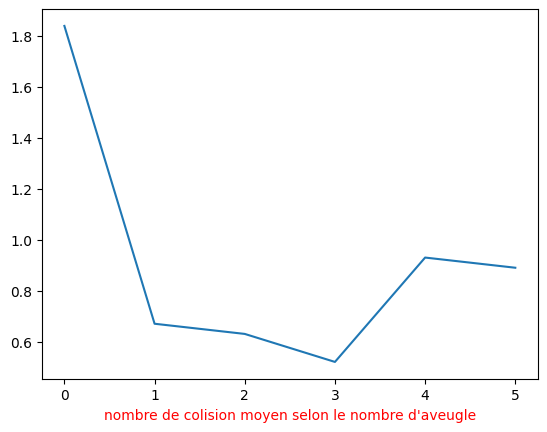

In [47]:
plt.xlabel("nombre de colision moyen selon le nombre d'aveugle", color='r')
plt.plot(X,Y1)

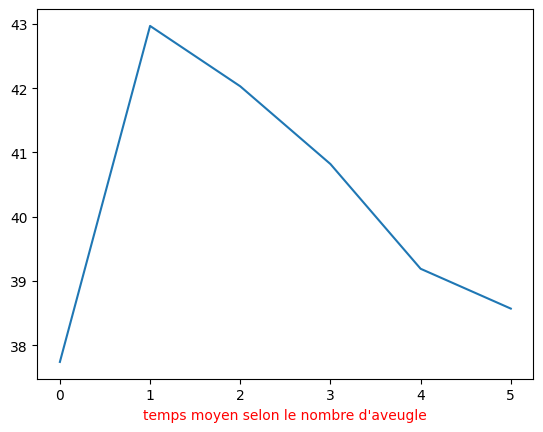

In [48]:
plt.xlabel("temps moyen selon le nombre d'aveugle", color='r')
plt.plot(X,Y2)